# Customer Purchase Insights - Blackwell Electronics

## Import libraries and read the data file 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.ticker as ticker
#give full path of where your data file - since I have in single folder I need not give full path
data = pd.read_csv('Demographic_Data.csv')
data.head()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


## Analysis 

In [2]:
#useful code for overview of your data 
data.describe()


,in-store,age,items,amount,region
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,0.500000,45.757925,4.504975,835.919670,2.675000
std,0.500003,15.715679,2.061238,721.273736,1.126672
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.140000,2.000000
50%,0.500000,45.000000,4.000000,582.315000,3.000000
75%,1.000000,56.000000,6.000000,1233.700000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


In [3]:
#helps get data type of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [4]:
#total number of rows and columns in the dataset 
data.shape

(80000, 5)

In [5]:
#columns in your data set 
data.columns

Index(['in-store', 'age', 'items', 'amount', 'region'], dtype='object')

In [6]:
#column count 
data['in-store'].value_counts()

1    40000
0    40000
Name: in-store, dtype: int64

In [7]:
#column count 
data['age'].value_counts()

53    1829
32    1789
42    1785
36    1784
34    1783
      ... 
75     334
76     329
79     321
18     223
85     185
Name: age, Length: 68, dtype: int64

In [8]:
#column count 
data['items'].value_counts()

4    11596
6    11522
3    11487
7    11378
2    11290
5    11238
8     5788
1     5701
Name: items, dtype: int64

In [9]:
#column count 
data['region'].value_counts()

4    26000
2    20000
3    18000
1    16000
Name: region, dtype: int64

In [10]:
#drops all duplicates - looks like this data set has 21 duplicate rows 
data.drop_duplicates()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [11]:
#similar to info 
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [12]:
#to find if your data set has null 
print(data.isnull().sum())

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64


In [13]:
#removes any NA
data.dropna()

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1
...,...,...,...,...,...
79995,1,71,3,558.82,1
79996,0,59,7,1932.00,3
79997,0,54,1,414.16,2
79998,1,49,4,335.32,1


In [14]:
#similar to describe but for single column finding mean 
data['age'].mean()

45.757925

In [15]:
#trying pivot view - not quiet there yet
data.pivot( columns='region')['amount']

region,1,2,3,4
0,NaN,281.03,NaN,NaN
1,NaN,219.51,NaN,NaN
2,NaN,NaN,NaN,1525.7
3,NaN,NaN,715.25,NaN
4,1937.50,NaN,NaN,NaN
...,...,...,...,...
79995,558.82,NaN,NaN,NaN
79996,NaN,NaN,1932.00,NaN
79997,NaN,414.16,NaN,NaN
79998,335.32,NaN,NaN,NaN


In [16]:
#find unique values 
data['age'].unique()

array([37, 35, 45, 46, 33, 24, 43, 66, 51, 47, 44, 32, 48, 34, 20, 58, 49,
       55, 31, 53, 21, 42, 40, 28, 59, 41, 74, 19, 54, 57, 30, 27, 38, 26,
       36, 22, 39, 69, 81, 65, 61, 62, 78, 29, 67, 80, 73, 25, 52, 50, 70,
       56, 60, 64, 71, 63, 84, 72, 83, 79, 18, 23, 68, 75, 85, 76, 77, 82])

In [17]:
#similar to info - find median 
data.median()

in-store      0.500
age          45.000
items         4.000
amount      582.315
region        3.000
dtype: float64

In [18]:

#todatl column count 
data['amount'].count()

80000

In [19]:
#todatl column sum 
data['amount'].sum()

66873573.57050001

In [20]:
#value count 
data['amount'].value_counts()

1914.000    9
1129.500    8
1073.500    8
1487.400    8
1318.300    7
           ..
46.762      1
630.080     1
853.340     1
186.260     1
192.000     1
Name: amount, Length: 56112, dtype: int64

In [21]:
# loc - access rows by label  and iloc - access rows by integer location based  - different choices of indexing 
# need to read more 
data.iloc[:5]

,in-store,age,items,amount,region
0,0,37,4,281.03,2
1,0,35,2,219.51,2
2,1,45,3,1525.70,4
3,1,46,3,715.25,3
4,1,33,4,1937.50,1


In [22]:
#finding Percentage 
data['region'].value_counts(normalize=True)

4    0.325
2    0.250
3    0.225
1    0.200
Name: region, dtype: float64

In [23]:
#tried grouping 
instore_grp=data.groupby(['in-store'])

In [24]:
data['in-store'].value_counts()

1    40000
0    40000
Name: in-store, dtype: int64

In [25]:
#filtering 
filt=data['in-store'] == '1'
data.loc[filt]['amount'].value_counts()

Series([], Name: amount, dtype: int64)

## Finding 1 - Online spend more than in-store 

In [26]:
#used grouping to sum all columns - Question how to see amount as amount? it shows as a float 
# This concat helps me answer that online spend more than instore - #1 finding using Pandas
pd.concat([instore_grp.amount.sum()], axis=1).style.format('${0:,.0f}')

,amount
in-store,
0,"$35,902,788"
1,"$30,970,785"


In [27]:
#grouping region 
region_grp = data.groupby(['region'])


In [28]:
grouped_df = data.groupby(['region']).size()
grouped_df[1]

16000

In [29]:
#This shows 4 region has more transaction than 2,3,and 1. The order is 4,2,3,and 1. - #2 Finding
# I could have found what is the total amount per region spend if i know how to show in $ 
#'${:,.2f}'.format(1234.5)
pd.concat([region_grp.sum()], axis=1) 

,in-store,age,items,amount
region,,,,
1,16000,699263,72161,1.192258e+07
2,0,1132207,90255,5.042184e+06
3,10999,821645,80892,1.652345e+07
4,13001,1007519,117090,3.338535e+07


# Which region spend more/least? 
## Finding 2 - Region 4 i.e. West brings more revenue 
## Finidng 3 - Region 2 i.e. South needs more attention 

In [30]:
# at last found the stlying usage - hey I am a web developer stlying is imprtant :) 
#3 finding that region which bought more revenue is 4,3,1,and 2 - 2 needs lot of attention since its not performing
#well i.e south region 
(data.groupby('region')['amount']
 .agg(['sum'])
 .style.format('${0:,.0f}'))

,sum
region,
1,"$11,922,584"
2,"$5,042,184"
3,"$16,523,453"
4,"$33,385,352"


In [31]:
#trying pivot 
pivot1 = pd.pivot_table(data,index='region',values='amount',aggfunc='sum')
pivot1.style.format('${0:,.0f}')

,amount
region,
1,"$11,922,584"
2,"$5,042,184"
3,"$16,523,453"
4,"$33,385,352"


In [32]:
#Discretization example - pd.cut 
# lesson learnt - do not drop anything :/
data['Age_grp']= pd.cut(data.age,bins=[18,24,34,44,54,64,85],labels=['18-24','24-34','34-44','44-54','54-64','64-85'])

data  

,in-store,age,items,amount,region,Age_grp
0,0,37,4,281.03,2,34-44
1,0,35,2,219.51,2,34-44
2,1,45,3,1525.70,4,44-54
3,1,46,3,715.25,3,44-54
4,1,33,4,1937.50,1,24-34
...,...,...,...,...,...,...
79995,1,71,3,558.82,1,64-85
79996,0,59,7,1932.00,3,54-64
79997,0,54,1,414.16,2,44-54
79998,1,49,4,335.32,1,44-54


##  Finding 4 - Age 20-62 spend more than other age group. Top age to sepnd more is 39 and least is 85

In [33]:
#4 finding  - Age 20-62 spend more than other age groups. Top age group is 39 and least is 85
pivot2 = pd.pivot_table(data,index='age',values='amount',aggfunc='sum')
pivot2.sort_values('amount',ascending=False).style.format('${0:,.0f}')

,amount
age,
39,"$1,617,809"
53,"$1,610,641"
31,"$1,606,716"
35,"$1,594,952"
37,"$1,591,418"
47,"$1,588,055"
38,"$1,587,103"
36,"$1,587,101"
28,"$1,585,286"


In [34]:
pivot3 = pd.pivot_table(data,index='age',columns='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot3.style.format('${0:,.0f}')

in-store,0,1
age,,
18,"$322,133",$0
19,"$707,752","$277,132"
20,"$731,973","$551,940"
21,"$602,304","$585,540"
22,"$723,591","$541,551"
23,"$611,679","$556,758"
24,"$690,962","$692,321"
25,"$717,770","$812,780"
26,"$653,483","$755,460"


# Do Customers in different regions spend more per transaction?
## Finding 5 - North is not spending any online and South is not spending any in-store. North and South needs more marketing campaigns for online. Souh and east for in-store. Top sales region is West both instore and online.

In [35]:
pivot4 = pd.pivot_table(data,index='in-store',columns='region',values='amount',aggfunc='sum',margins=True)
pivot4.style.format('${0:,.0f}')

region,1,2,3,4,All
in-store,,,,,
0,$nan,"$5,042,184","$10,793,540","$20,067,064","$35,902,788"
1,"$11,922,584",$nan,"$5,729,913","$13,318,288","$30,970,785"
All,"$11,922,584","$5,042,184","$16,523,453","$33,385,352","$66,873,574"


In [36]:
#discretizing the data using pd.cut - bins according to google demographics age buckets 
data['Age_cut']= pd.cut(data.age,bins=[18,24,34,44,54,64,85],labels=['18-24','24-34','34-44','44-54','54-64','64-85'])

data['Age_cut']

(data.groupby(data['Age_cut'])
 .agg(['sum'])
)['amount'].sort_values('sum',ascending=False).style.format('${0:,.0f}')

,sum
Age_cut,
34-44,"$15,613,628"
44-54,"$15,460,376"
24-34,"$15,355,996"
54-64,"$9,101,327"
18-24,"$7,273,503"
64-85,"$3,746,611"


In [37]:
pivot5 = pd.pivot_table(data,index='Age_cut',columns='in-store',values='amount',aggfunc='sum',fill_value=0,margins=True)
pivot5.style.format('${0:,.0f}')

in-store,0,1,All
Age_cut,,,
18-24,"$4,068,261","$3,205,242","$7,273,503"
24-34,"$7,495,069","$7,860,926","$15,355,996"
34-44,"$7,783,148","$7,830,480","$15,613,628"
44-54,"$7,677,305","$7,783,071","$15,460,376"
54-64,"$6,727,967","$2,373,360","$9,101,327"
64-85,"$1,828,905","$1,917,706","$3,746,611"
All,"$35,580,655","$30,970,785","$66,551,440"



## 1 and 8 are purchased less than rest. Top no of items is 6 items and its online. 

In [38]:
pivot6 = pd.pivot_table(data,index='items',columns='in-store',values='amount',aggfunc='sum',fill_value=0,margins=True)
pivot6.style.format('${0:,.0f}')

in-store,0,1,All
items,,,
1,"$2,497,788","$2,207,740","$4,705,527"
2,"$5,144,497","$4,419,669","$9,564,166"
3,"$5,096,851","$4,514,263","$9,611,113"
4,"$5,192,738","$4,427,298","$9,620,036"
5,"$4,978,935","$4,396,964","$9,375,899"
6,"$5,146,989","$4,477,389","$9,624,378"
7,"$5,158,012","$4,287,299","$9,445,311"
8,"$2,686,979","$2,240,163","$4,927,143"
All,"$35,902,788","$30,970,785","$66,873,574"


In [39]:
pivot7 = pd.pivot_table(data,index='items',columns='region',values='amount',aggfunc='sum',fill_value=0,margins=True)
pivot7.style.format('${0:,.0f}')

region,1,2,3,4,All
items,,,,,
1,"$831,104","$371,701","$1,126,742","$2,375,980","$4,705,527"
2,"$1,704,421","$707,179","$2,400,234","$4,752,332","$9,564,166"
3,"$1,724,660","$706,362","$2,381,780","$4,798,311","$9,611,113"
4,"$1,738,248","$721,991","$2,501,152","$4,658,645","$9,620,036"
5,"$1,672,342","$707,222","$2,290,797","$4,705,538","$9,375,899"
6,"$1,744,998","$737,463","$2,271,135","$4,870,781","$9,624,378"
7,"$1,609,124","$731,934","$2,337,951","$4,766,302","$9,445,311"
8,"$897,686","$358,332","$1,213,662","$2,457,463","$4,927,143"
All,"$11,922,584","$5,042,184","$16,523,453","$33,385,352","$66,873,574"


In [40]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'Age_grp', 'Age_cut'], dtype='object')


## Data Visualization 

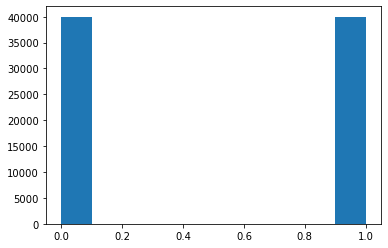

In [41]:
plt.hist(data['in-store'])
plt.show()

(array([40000.,     0.,     0., 40000.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 <BarContainer object of 4 artists>)

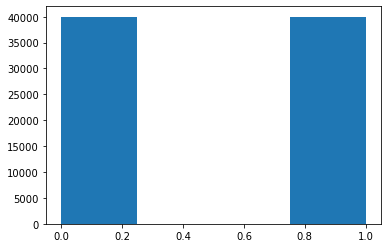

In [42]:
plt.hist(data['in-store'], bins=4) 

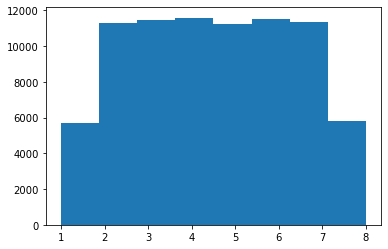

In [101]:
plt.hist(data['items'],bins=8)
plt.show()

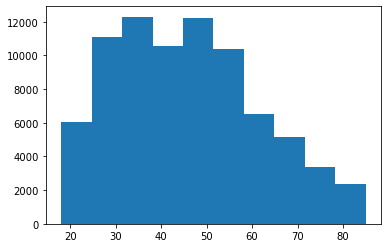

In [44]:
plt.hist(data['age'])
plt.show()

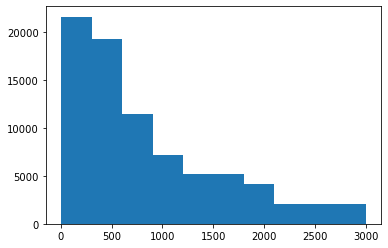

In [45]:
plt.hist(data['amount'])
plt.show()

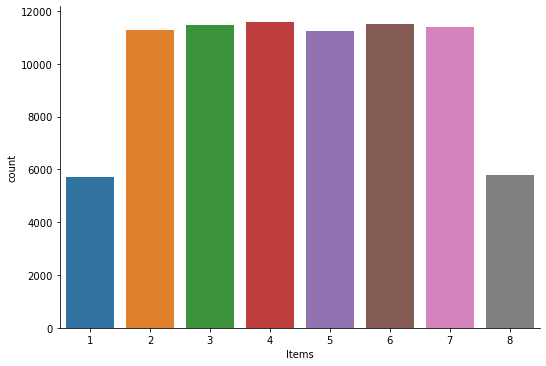

In [46]:
fg = sns.catplot(x='items', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Items')

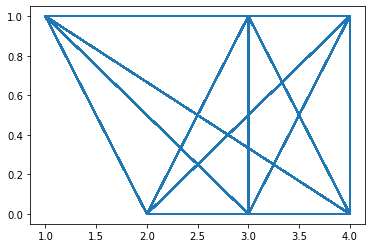

In [47]:
t=data['region']
s= data['in-store']
fig,ax = plt.subplots()
ax.plot(t,s)
plt.show()

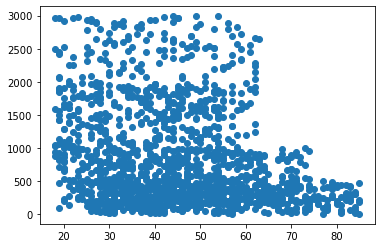

In [48]:
#Scatter plot
data_sample = data.sample(1500)
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.show()

In [49]:
#box plot
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'Age_grp', 'Age_cut'], dtype='object')


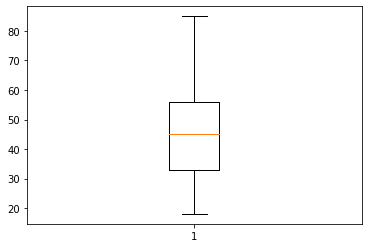

In [50]:
A = data['age']
plt.boxplot(A,0,'gD')
plt.show()

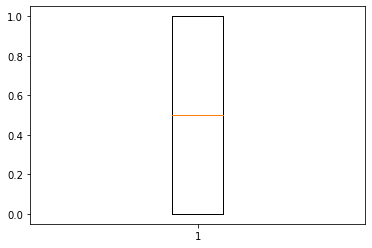

In [51]:
B = data['in-store']
plt.boxplot(B,0,'gD')
plt.show()

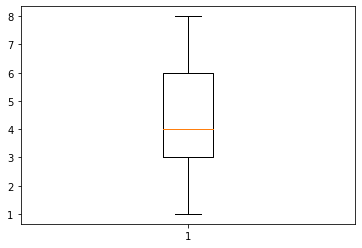

In [52]:
C = data['items']
plt.boxplot(C,0,'gD')
plt.show()

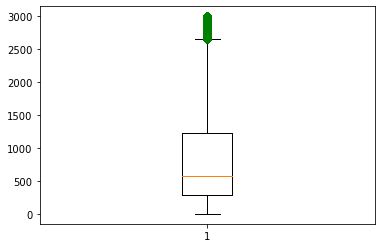

In [53]:
D = data['amount']
plt.boxplot(D,0,'gD')
plt.show()

In [54]:
# i am trying to find the outliers here - I see transaction above 2,700 and 3,000 having some uniqueness 
filterinfDataframe = data[(data['amount'] > 2700) & (data['amount'] < 4000) ]
print(filterinfDataframe)

       in-store  age  items  amount  region Age_grp Age_cut
18            0   35      2  2791.6       4   34-44   34-44
57            0   53      5  2952.8       4   44-54   44-54
121           0   44      2  2795.0       3   34-44   34-44
207           0   56      6  2860.3       3   54-64   54-64
228           0   32      2  2891.6       4   24-34   24-34
...         ...  ...    ...     ...     ...     ...     ...
79922         0   55      2  2871.4       3   54-64   54-64
79934         0   46      6  2836.4       4   44-54   44-54
79955         0   47      4  2829.0       4   44-54   44-54
79969         0   22      7  2906.4       4   18-24   18-24
79976         0   40      1  2854.8       4   34-44   34-44

[2015 rows x 7 columns]


# Do Customers in different regions spend more per transaction?
### Another way to answer this question 
## Inference is that region 3 and 4 brought more sales which are above 2700 dollars in signle transaction and only in online  

In [55]:
pivot8 = pd.pivot_table(filterinfDataframe,index='in-store',columns='region',values='amount',aggfunc='sum',fill_value=0,margins=True)
pivot8.style.format('${0:,.0f}')

region,3,4,All
in-store,,,
0,"$1,930,163","$3,813,728","$5,743,891"
All,"$1,930,163","$3,813,728","$5,743,891"


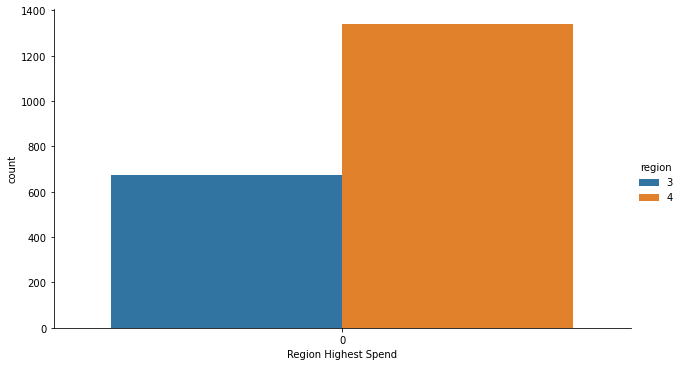

In [56]:
reg_spend = sns.catplot(x='in-store', data=filterinfDataframe, hue='region', kind='count', aspect=1.75)
reg_spend.set_xlabels('Region Highest Spend')

In [57]:
pivot9 = pd.pivot_table(filterinfDataframe,index='items',columns='region',values='amount',aggfunc='sum',fill_value=0,margins=True)
pivot9.style.format('${0:,.0f}')

region,3,4,All
items,,,
1,"$130,670","$279,084","$409,755"
2,"$273,576","$556,536","$830,111"
3,"$273,897","$488,404","$762,301"
4,"$288,944","$608,032","$896,976"
5,"$243,267","$531,637","$774,904"
6,"$302,638","$507,530","$810,168"
7,"$268,394","$545,889","$814,283"
8,"$148,777","$296,616","$445,393"
All,"$1,930,163","$3,813,728","$5,743,891"


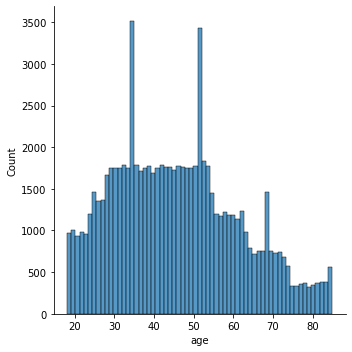

In [58]:
#seaborn
age_dist = sns.displot(data.age)

# Relations between number of items purchased and amount

# Correlation

In [116]:
def correlation_heatmap(data):
    correlations = data.corr()
    print(correlations)

In [60]:
# amount and items have a weak positive correlation.There is a moderate correlation between region and amount. 
#remaining have weak negative correlation
# the values are between -1 and +1 and - is negative correlation and + is positive. 
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178256 -0.003954 -0.085474 -0.133114
age      -0.178256  1.000000  0.000679 -0.282089 -0.235446
items    -0.003954  0.000679  1.000000  0.000367 -0.001925
amount   -0.085474 -0.282089  0.000367  1.000000  0.403504
region   -0.133114 -0.235446 -0.001925  0.403504  1.000000


# Covariance 

In [61]:
#covariance guages the linear behavior of two variables either positive, negative or neutral. 
#age is positive with items 
#items is positive with amount 
#amount is positive with region 
#region is positive with amount,items, and age 
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400718 -0.004075     -30.825404   -0.074988
age       -1.400718   246.982562  0.021980   -3197.566591   -4.168901
items     -0.004075     0.021980  4.248703       0.545629   -0.004471
amount   -30.825404 -3197.566591  0.545629  520235.802331  327.903000
region    -0.074988    -4.168901 -0.004471     327.903000    1.269391


# scatter plot to find the relation between Amount and Items

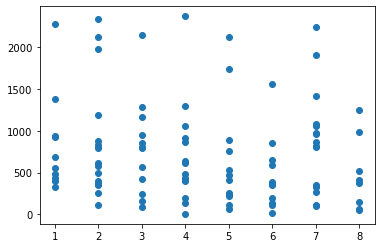

In [117]:
#Scatter plot 2 
data_sample = data.sample(100)
x = data_sample['items']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
plt.show()

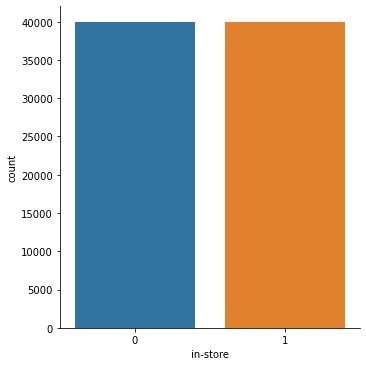

In [63]:
# Factor plot of in-store
sns.catplot(x='in-store',data=data,kind='count')

In [64]:
data.groupby('items')['items'].count()

items
1     5701
2    11290
3    11487
4    11596
5    11238
6    11522
7    11378
8     5788
Name: items, dtype: int64

In [65]:
data.groupby('region')['region'].count()

region
1    16000
2    20000
3    18000
4    26000
Name: region, dtype: int64

## Region 1 = North only did in-store transactions. Regions 2 = South did only online transactions. Region 3 = East did more in-store than online. Region 4 = West did almost equal. 
### whatever marketing strategies are in region 4 should be applied in rest of the region to have the equal transactions in both online and in-store.

In [66]:
data.groupby(['region', 'in-store'])['region'].count()

region  in-store
1       1           16000
2       0           20000
3       0            7001
        1           10999
4       0           12999
        1           13001
Name: region, dtype: int64

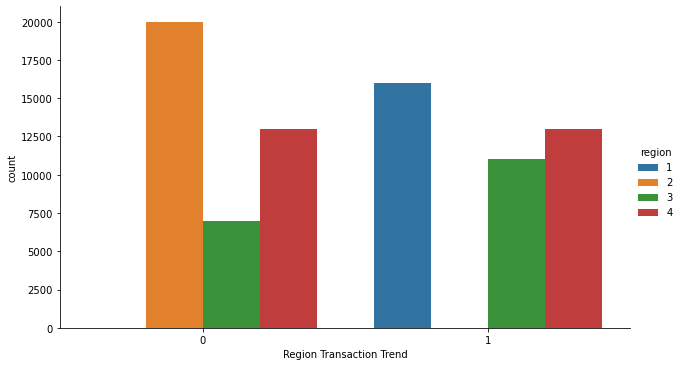

In [67]:
g = sns.catplot(x='in-store', data=data, hue='region', kind='count', aspect=1.75)
g.set_xlabels('Region Transaction Trend')

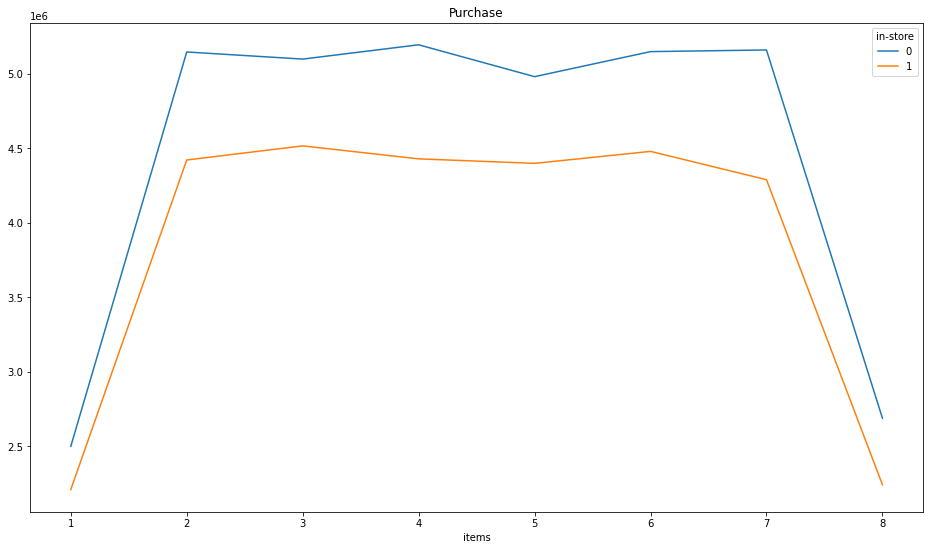

In [68]:
pivot10 = pd.pivot_table(data,index='items',columns='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot10.plot(figsize=(16, 9), title='Purchase');
plt.ticklabel_format(style='sci', axis='y')

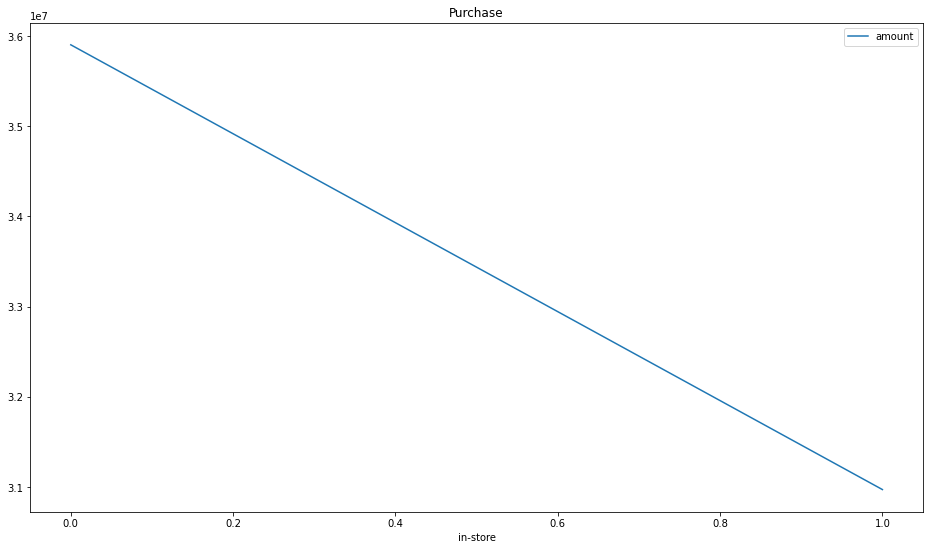

In [69]:
pivot11 = pd.pivot_table(data,index='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot11.plot(figsize=(16, 9), title='Purchase');
plt.ticklabel_format(style='sci', axis='y')

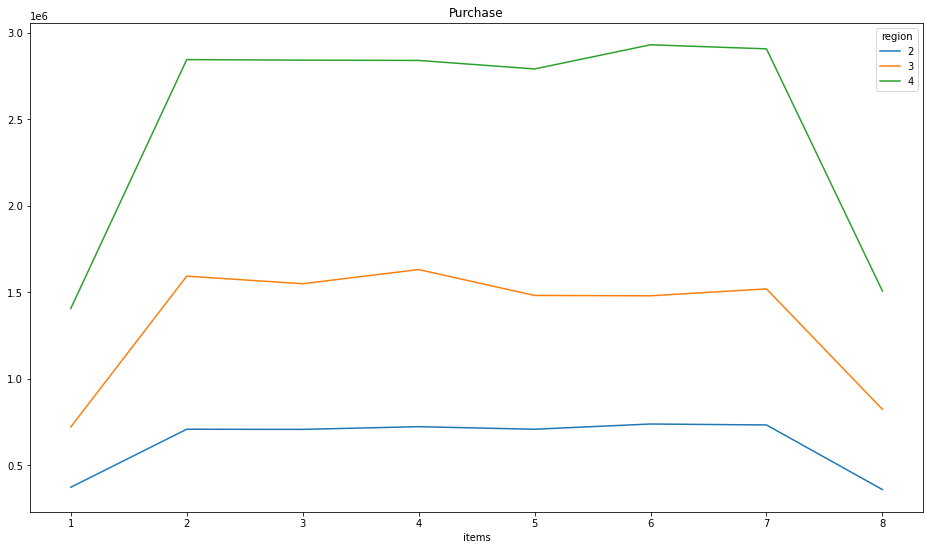

In [70]:
filterinfData = data[(data['in-store'] == 0)]
pivot12 = pd.pivot_table(filterinfData,index='items',columns='region',values='amount',aggfunc='sum',fill_value=0)
pivot12.plot(figsize=(16, 9), title='Purchase');
plt.ticklabel_format(style='sci', axis='y')

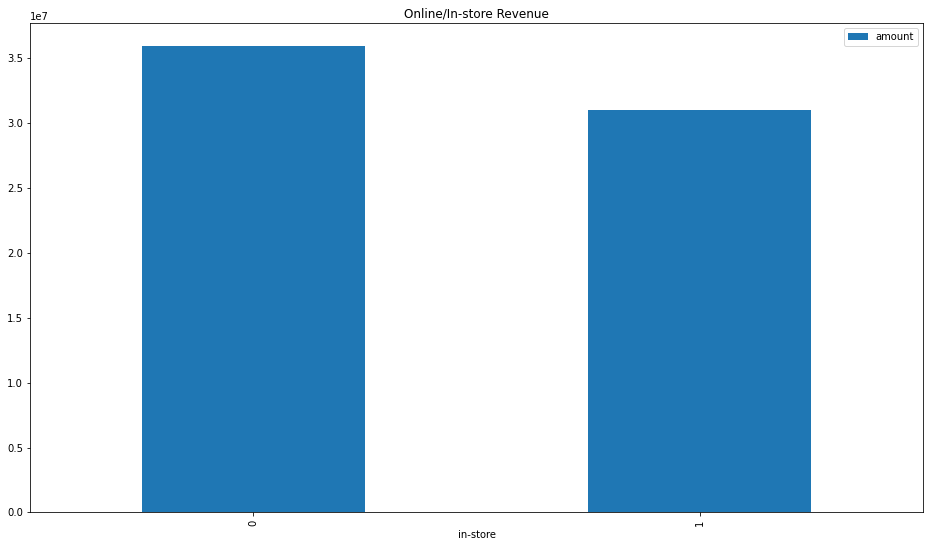

In [71]:
#online and instore spend grouping
pivot14 = pd.pivot_table(data,index='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot14.plot.bar(figsize=(16, 9), title='Online/In-store Revenue');

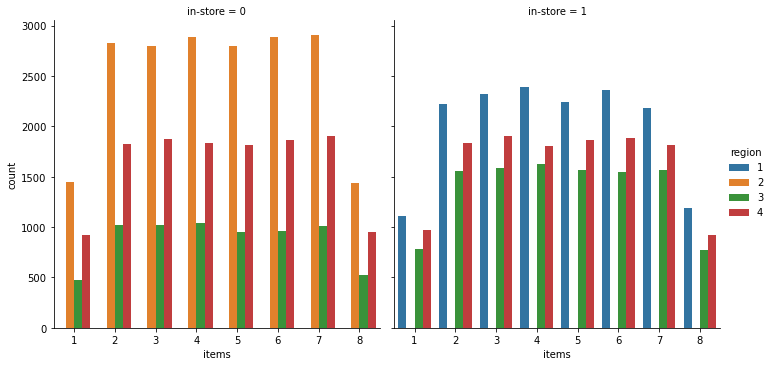

In [72]:
sns.catplot(x='items', data=data, kind='count', hue='region', col='in-store')

## Region 1 = North only did in-store transactions. Regions 2 = South did only online transactions. Region 3 = East did more in-store than online. Region 4 = West did almost equal. 
### whatever marketing strategies are in region 4 should be applied in rest of the region to have the equal transactions in both online and in-store.

In [73]:
data.groupby(['region', 'in-store'])['region'].count()

region  in-store
1       1           16000
2       0           20000
3       0            7001
        1           10999
4       0           12999
        1           13001
Name: region, dtype: int64

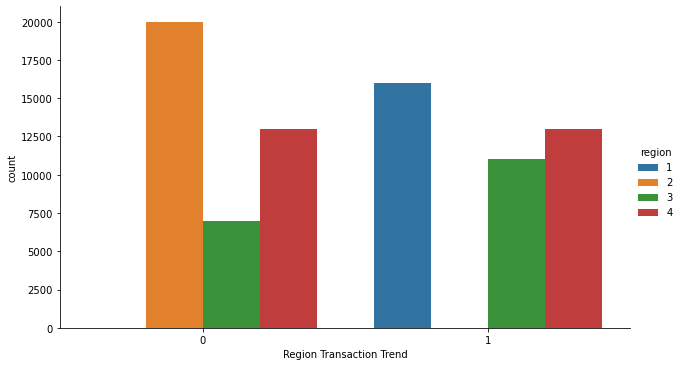

In [74]:
g = sns.catplot(x='in-store', data=data, hue='region', kind='count', aspect=1.75)
g.set_xlabels('Region Transaction Trend')

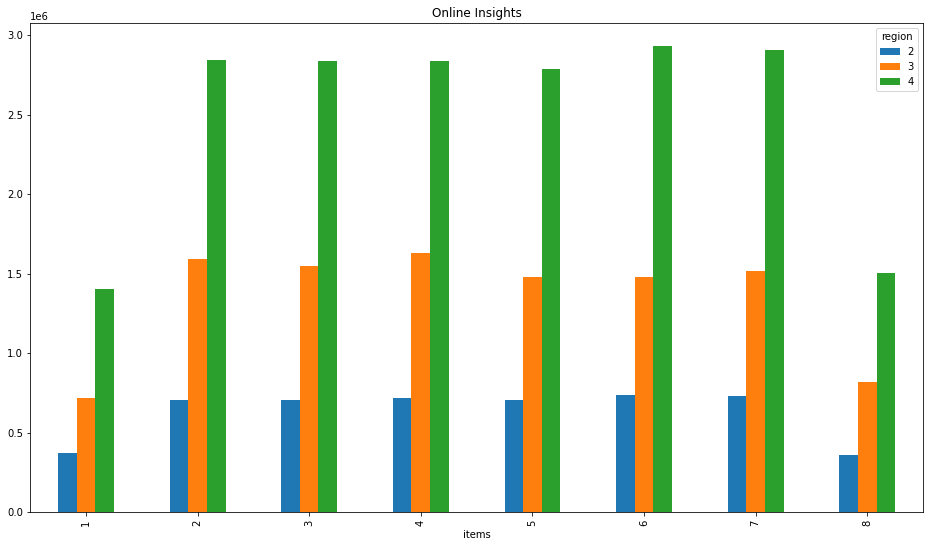

In [75]:
#Online data filtered and plotted  
filterinfData = data[(data['in-store'] == 0)]
pivot11 = pd.pivot_table(filterinfData,index='items',columns='region',values='amount',aggfunc='sum',fill_value=0)
pivot11.plot.bar(figsize=(16, 9), title='Online Insights');

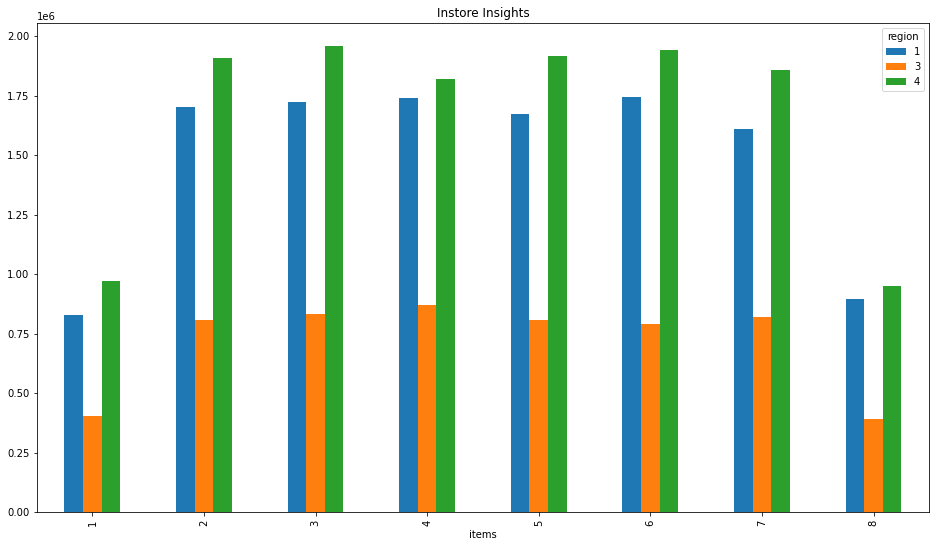

In [76]:
#in-store data filtered and plotted  
filterinfData_store = data[(data['in-store'] == 1)]
pivot14 = pd.pivot_table(filterinfData_store,index='items',columns='region',values='amount',aggfunc='sum',fill_value=0)
pivot14.plot.bar(figsize=(16, 9), title='Instore Insights');

## Which region spend more?

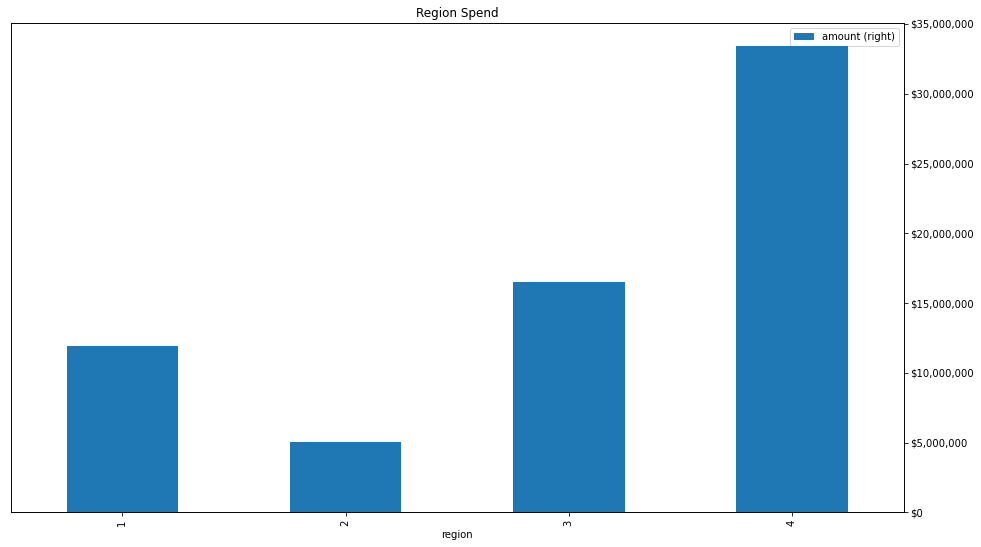

In [77]:

pivot15 = pd.pivot_table(data,index='region',values='amount',aggfunc='sum')

pivot15.plot.bar(figsize=(16, 9), title='Region Spend',secondary_y= 'amount').yaxis.set_major_formatter('${x:,.0f}')


# Amount and Items plot

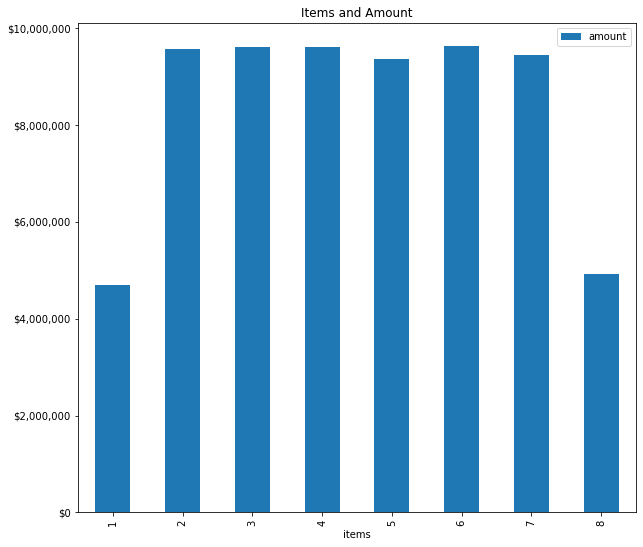

In [78]:
#items and amount relation
pivot16 = pd.pivot_table(data,index='items',values='amount',aggfunc='sum')
pivot16.plot.bar(figsize=(10, 9), title='Items and Amount').yaxis.set_major_formatter('${x:,.0f}')

## Items and amount by region purchased relation

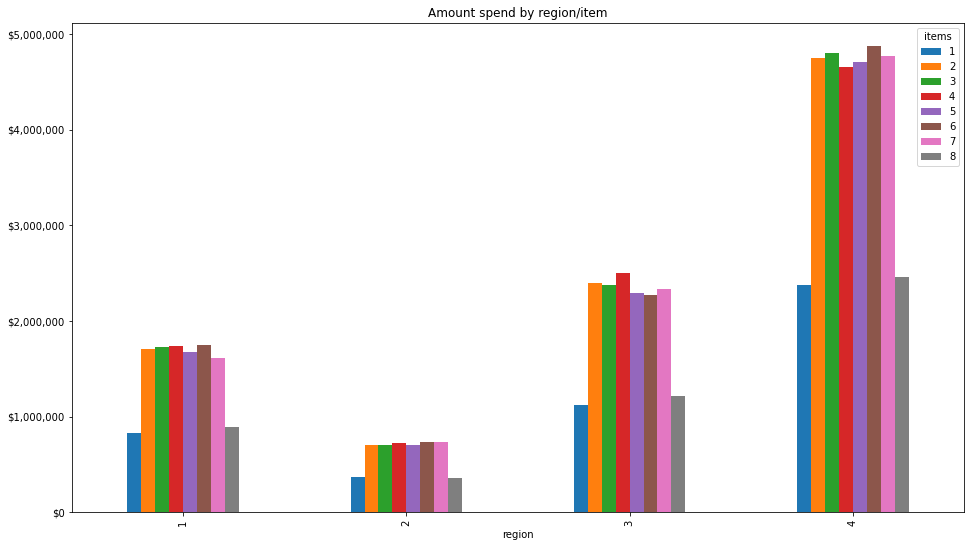

In [79]:

pivot17 = pd.pivot_table(data,index='region',columns='items',values='amount',aggfunc='sum',fill_value=0)
pivot17.plot.bar(figsize=(16, 9), title='Amount spend by region/item').yaxis.set_major_formatter('${x:,.0f}')

## Age bucket

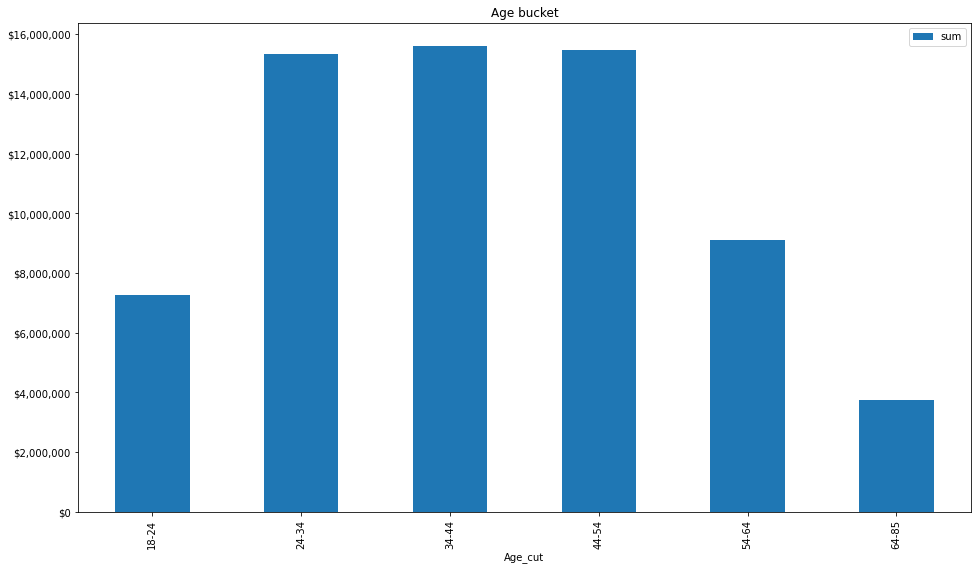

In [80]:
#discretizing the data using pd.cut - bins according to google demographics age buckets 
data['Age_cut']= pd.cut(data.age,bins=[18,24,34,44,54,64,85],labels=['18-24','24-34','34-44','44-54','54-64','64-85'])

data['Age_cut']

h =(data.groupby(data['Age_cut'])
 .agg(['sum'])
)['amount']

h.plot.bar(figsize=(16, 9), title='Age bucket').yaxis.set_major_formatter('${x:,.0f}')


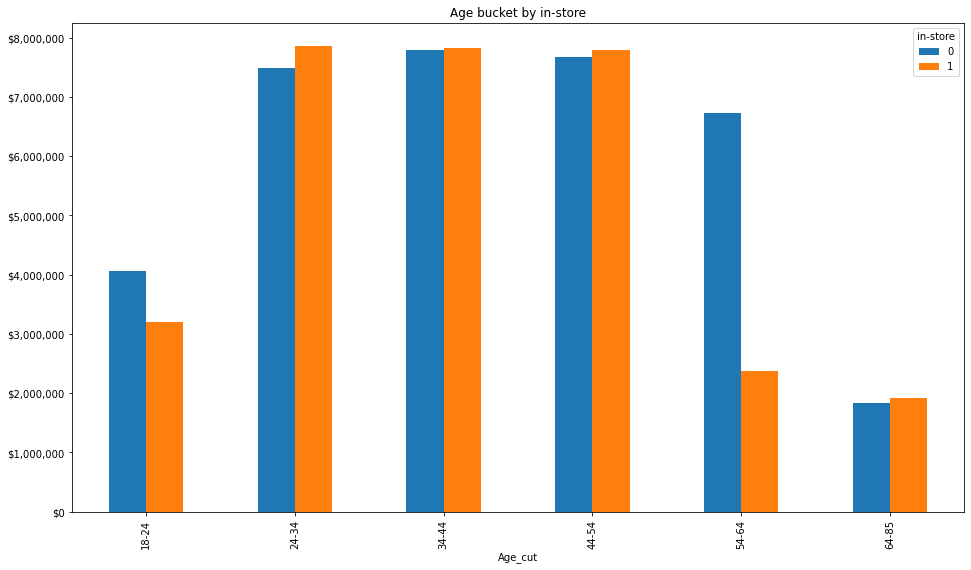

In [81]:
# Age bucket by online and instore 
pivot18 = pd.pivot_table(data,index='Age_cut',columns='in-store',values='amount',aggfunc='sum',fill_value=0)
pivot18.plot.bar(figsize=(16, 9), title='Age bucket by in-store').yaxis.set_major_formatter('${x:,.0f}')

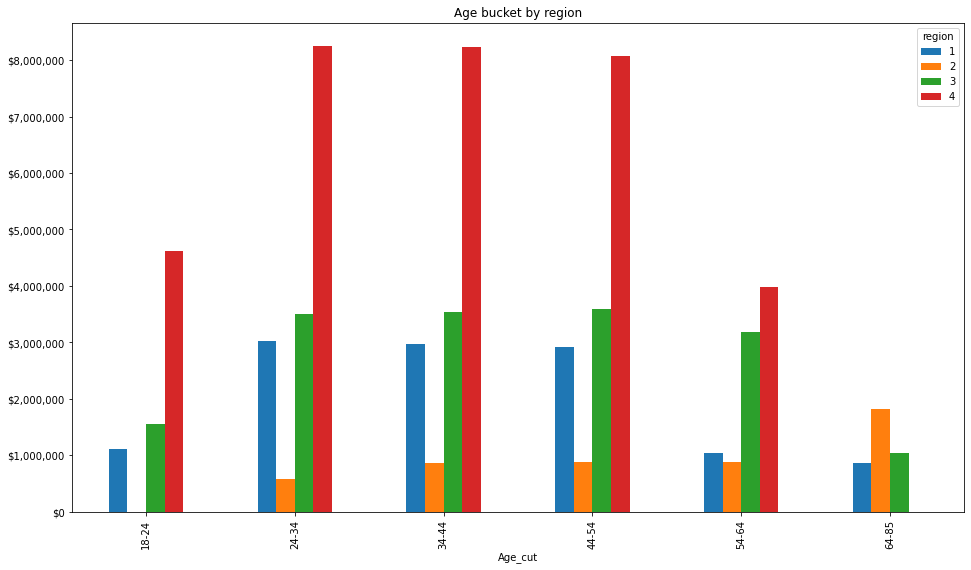

In [82]:
# Age cut by region 
pivot19 = pd.pivot_table(data,index='Age_cut',columns='region',values='amount',aggfunc='sum',fill_value=0)
pivot19.plot.bar(figsize=(16, 9), title='Age bucket by region').yaxis.set_major_formatter('${x:,.0f}')

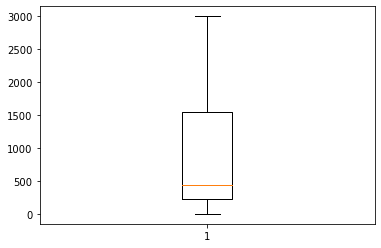

In [83]:
#online spend more between 250 to 1500 dollars.
filterinf = data[(data['in-store'] == 0  ) ]
M = filterinf['amount']
plt.boxplot(M,0,'gD')
plt.show()

In [84]:
#mean of online transactions 
filterinf.mean()

in-store      0.000000
age          48.559325
items         4.513125
amount      897.569707
region        2.824975
dtype: float64

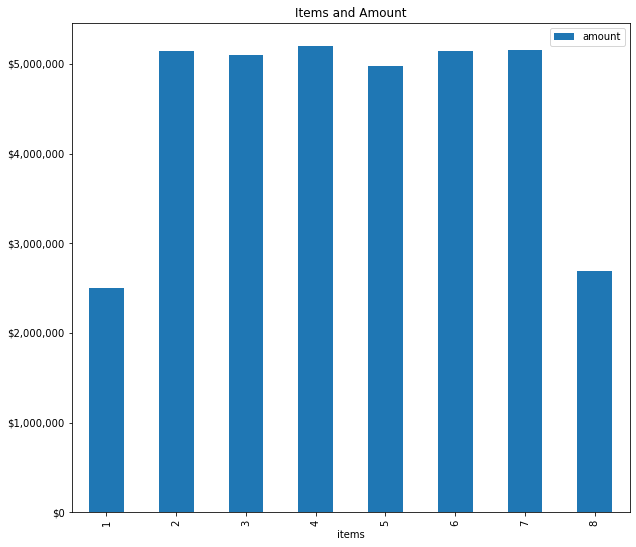

In [105]:
filter_online = data[(data['in-store'] == 0  ) ]
pivot23 = pd.pivot_table(filter_online,index='items',values='amount',aggfunc='sum')
pivot23.plot.bar(figsize=(10, 9), title='Items and Amount').yaxis.set_major_formatter('${x:,.0f}')

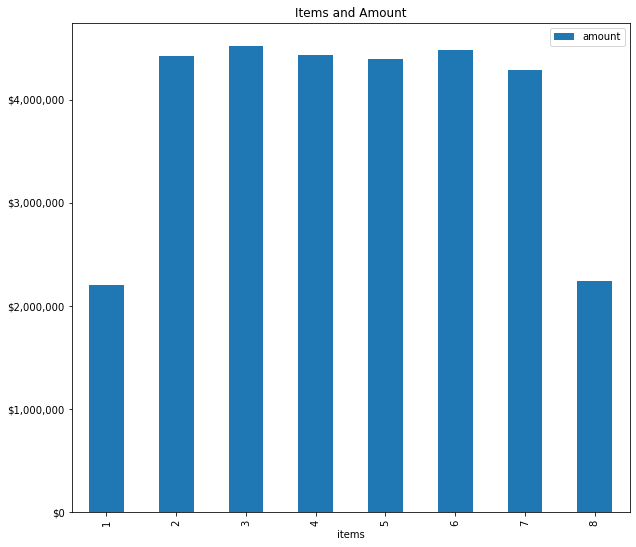

In [106]:
filter_instore = data[(data['in-store'] == 1 ) ]
pivot23 = pd.pivot_table(filter_instore,index='items',values='amount',aggfunc='sum')
pivot23.plot.bar(figsize=(10, 9), title='Items and Amount').yaxis.set_major_formatter('${x:,.0f}')

## Amount cut - discretizing by amount 

In [118]:
data['Amount_cut']= pd.cut(data.amount,bins=[0,500,1000,1500,2000,2500,3000],labels=['0-500','500-1000','1000-1500','1500-2000','2000-2500','2500-3000'])

data['Amount_cut']

0            0-500
1            0-500
2        1500-2000
3         500-1000
4        1500-2000
           ...    
79995     500-1000
79996    1500-2000
79997        0-500
79998        0-500
79999     500-1000
Name: Amount_cut, Length: 80000, dtype: category
Categories (6, object): ['0-500' < '500-1000' < '1000-1500' < '1500-2000' < '2000-2500' < '2500-3000']

In [126]:
pivot20 = pd.pivot_table(data,index='Amount_cut',columns='region',values='amount',aggfunc='count',fill_value=0)
pivot20

region,1,2,3,4
Amount_cut,,,,
0-500,5844,20000,6270,4706
500-1000,6525,0,6916,5725
1000-1500,1821,0,1210,5583
1500-2000,1810,0,1240,5599
2000-2500,0,0,1190,2190
2500-3000,0,0,1174,2197


<AxesSubplot:title={'center':'Amount spend by region'}, xlabel='Amount_cut'>

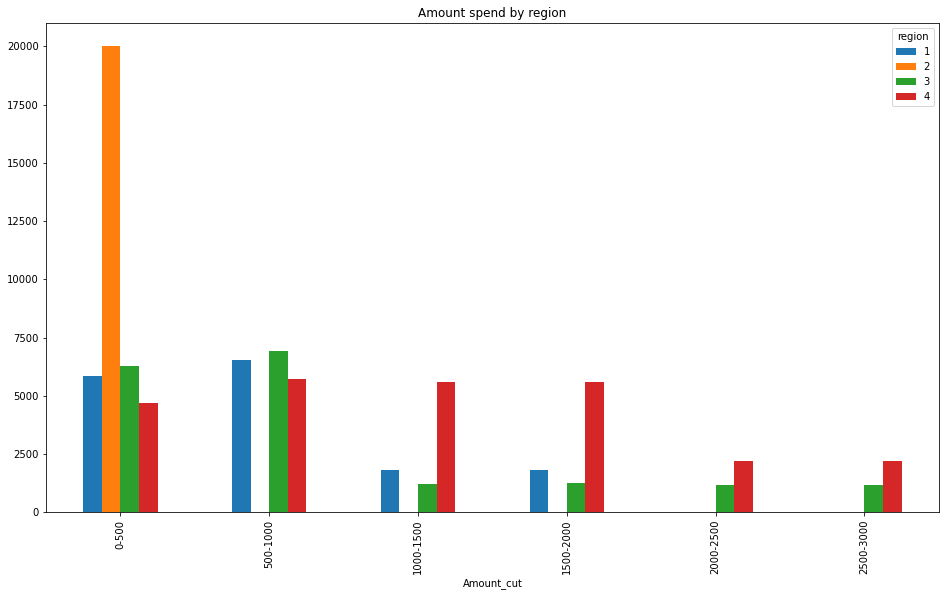

In [122]:
pivot20.plot.bar(figsize=(16, 9), title='Amount spend by region')

In [88]:
(data.groupby(data['Amount_cut'])
 .agg(['sum'])
)['amount'].sort_values('sum',ascending=False).style.format('${0:,.0f}')

,sum
Amount_cut,
1500-2000,"$15,143,257"
500-1000,"$14,361,543"
1000-1500,"$10,768,450"
0-500,"$9,719,374"
2500-3000,"$9,272,001"
2000-2500,"$7,608,948"
3000-3500,$0


In [127]:
pivot21 = pd.pivot_table(data,index='Amount_cut',columns='items',values='amount',aggfunc='count',fill_value=0)
pivot21.style.format('${0:,.0f}')

items,1,2,3,4,5,6,7,8
Amount_cut,,,,,,,,
0-500,"$2,658","$5,142","$5,235","$5,373","$5,184","$5,339","$5,275","$2,614"
500-1000,"$1,356","$2,710","$2,799","$2,841","$2,668","$2,692","$2,742","$1,358"
1000-1500,$625,"$1,176","$1,257","$1,174","$1,252","$1,262","$1,187",$681
1500-2000,$598,"$1,274","$1,248","$1,223","$1,211","$1,268","$1,210",$617
2000-2500,$236,$494,$477,$471,$483,$464,$497,$258
2500-3000,$228,$494,$471,$514,$440,$497,$467,$260


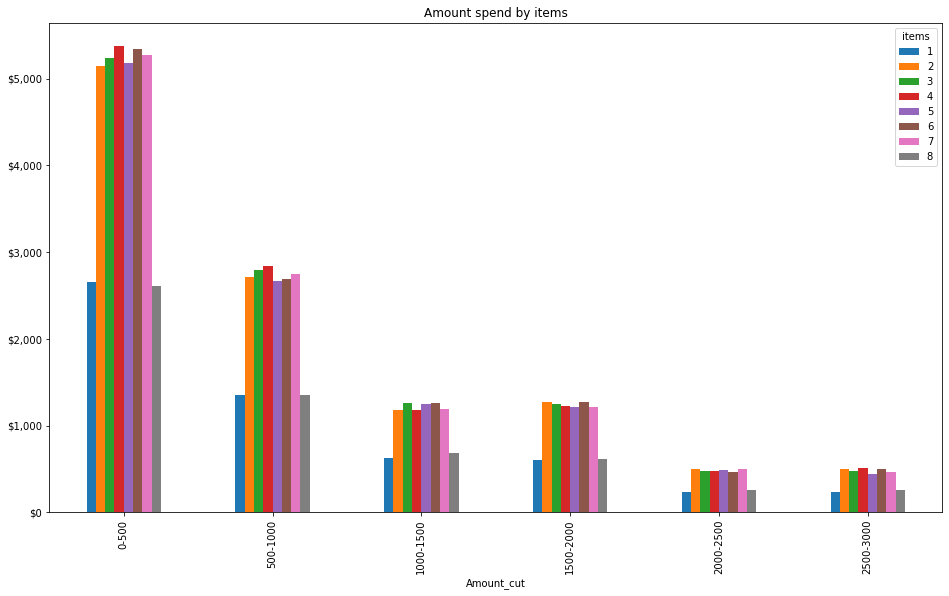

In [128]:
pivot21.plot.bar(figsize=(16, 9), title='Amount spend by items').yaxis.set_major_formatter('${x:,.0f}')

In [100]:
print(data.iloc[:,2].cov(data.iloc[:,3]))

0.5456294270773716
